In [1]:
#importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
#Fetching pages
website = 'https://www.worldometers.info/gdp/gdp-by-country/'
results = requests.get(website)
content = results.text

In [3]:
#Parsing the web content using soup
soup = BeautifulSoup(content, 'html.parser')


In [4]:
table = soup.find('table')

In [125]:
titles = soup.find_all('th')
titles

[<th>#</th>,
 <th>Country</th>,
 <th>GDP<br/> (nominal, 2022) </th>,
 <th>GDP<br/> (abbrev.)</th>,
 <th>GDP <br/> growth</th>,
 <th>Population<br/> (2022) </th>,
 <th>GDP <br/> per capita </th>,
 <th>Share of<br/> World GDP </th>]

In [126]:
titles_table = [title.text.strip() for title in titles]
print(titles_table)

['#', 'Country', 'GDP (nominal, 2022)', 'GDP (abbrev.)', 'GDP  growth', 'Population (2022)', 'GDP  per capita', 'Share of World GDP']


In [127]:
#creating a dataframe
GDP_rankings = pd.DataFrame(columns = titles_table)
GDP_rankings

,#,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth,Population (2022),GDP per capita,Share of World GDP


In [128]:
column_data =soup.find_all('tr')

In [129]:
#populating the dataframe with data
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    length = len(GDP_rankings)
    GDP_rankings.loc[length] = individual_row_data

In [130]:
GDP_rankings

,#,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth,Population (2022),GDP per capita,Share of World GDP
0,1,United States,"$25,462,700,000,000",$25.463 trillion,2.06%,"338,289,857","$75,269",25.32%
1,2,China,"$17,963,200,000,000",$17.963 trillion,2.99%,"1,425,887,337","$12,598",17.86%
2,3,Japan,"$4,231,140,000,000",$4.231 trillion,1.03%,"123,951,692","$34,135",4.21%
3,4,Germany,"$4,072,190,000,000",$4.072 trillion,1.79%,"83,369,843","$48,845",4.05%
4,5,India,"$3,385,090,000,000",$3.385 trillion,7.00%,"1,417,173,173","$2,389",3.37%
...,...,...,...,...,...,...,...,...
172,173,Sao Tome & Principe,"$546,680,342",$547 million,0.93%,"227,380","$2,404",0.00%
173,174,Micronesia,"$427,094,119",$427 million,-0.62%,"539,013",$792,0.00%
174,175,Marshall Islands,"$279,667,900",$280 million,1.50%,"41,569","$6,728",0.00%
175,176,Kiribati,"$223,352,943",$223 million,1.56%,"131,232","$1,702",0.00%


In [131]:
#saving to csv
GDP_rankings.to_csv('WorldGDP.csv', index = False)

# Data cleaning

In [4]:
#importing data
WorldGDPRankings = pd.read_csv('WorldGDP.csv')
WorldGDPRankings

,#,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth,Population (2022),GDP per capita,Share of World GDP
0,1,United States,"$25,462,700,000,000",$25.463 trillion,2.06%,"338,289,857","$75,269",25.32%
1,2,China,"$17,963,200,000,000",$17.963 trillion,2.99%,"1,425,887,337","$12,598",17.86%
2,3,Japan,"$4,231,140,000,000",$4.231 trillion,1.03%,"123,951,692","$34,135",4.21%
3,4,Germany,"$4,072,190,000,000",$4.072 trillion,1.79%,"83,369,843","$48,845",4.05%
4,5,India,"$3,385,090,000,000",$3.385 trillion,7.00%,"1,417,173,173","$2,389",3.37%
...,...,...,...,...,...,...,...,...
172,173,Sao Tome & Principe,"$546,680,342",$547 million,0.93%,"227,380","$2,404",0.00%
173,174,Micronesia,"$427,094,119",$427 million,-0.62%,"539,013",$792,0.00%
174,175,Marshall Islands,"$279,667,900",$280 million,1.50%,"41,569","$6,728",0.00%
175,176,Kiribati,"$223,352,943",$223 million,1.56%,"131,232","$1,702",0.00%


In [5]:
#renaming columns
col_rename = ['Rank', 'Country','Nominal 2022 GDP($)', '2022 Nomina GDP(abbrev)', 'GDP growth(%)', 'Population', 'GDP per capita($)','Share of World GDP(%)']
WorldGDPRankings.set_axis(col_rename, axis = 1, inplace = True)

In [6]:
WorldGDPRankings

,Rank,Country,Nominal 2022 GDP($),2022 Nomina GDP(abbrev),GDP growth(%),Population,GDP per capita($),Share of World GDP(%)
0,1,United States,"$25,462,700,000,000",$25.463 trillion,2.06%,"338,289,857","$75,269",25.32%
1,2,China,"$17,963,200,000,000",$17.963 trillion,2.99%,"1,425,887,337","$12,598",17.86%
2,3,Japan,"$4,231,140,000,000",$4.231 trillion,1.03%,"123,951,692","$34,135",4.21%
3,4,Germany,"$4,072,190,000,000",$4.072 trillion,1.79%,"83,369,843","$48,845",4.05%
4,5,India,"$3,385,090,000,000",$3.385 trillion,7.00%,"1,417,173,173","$2,389",3.37%
...,...,...,...,...,...,...,...,...
172,173,Sao Tome & Principe,"$546,680,342",$547 million,0.93%,"227,380","$2,404",0.00%
173,174,Micronesia,"$427,094,119",$427 million,-0.62%,"539,013",$792,0.00%
174,175,Marshall Islands,"$279,667,900",$280 million,1.50%,"41,569","$6,728",0.00%
175,176,Kiribati,"$223,352,943",$223 million,1.56%,"131,232","$1,702",0.00%


In [7]:
#Dropping unnecessary columns
WorldGDPRankings = WorldGDPRankings.drop(columns = ['Rank','2022 Nomina GDP(abbrev)'])

In [8]:
WorldGDPRankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                177 non-null    object
 1   Nominal 2022 GDP($)    177 non-null    object
 2   GDP growth(%)          177 non-null    object
 3   Population             177 non-null    object
 4   GDP per capita($)      177 non-null    object
 5   Share of World GDP(%)  177 non-null    object
dtypes: object(6)
memory usage: 8.4+ KB


In [9]:
#Data validation
WorldGDPRankings['Nominal 2022 GDP($)'] = WorldGDPRankings['Nominal 2022 GDP($)'].str.replace('$','')
WorldGDPRankings['Nominal 2022 GDP($)'] = WorldGDPRankings['Nominal 2022 GDP($)'].str.replace(',','')
WorldGDPRankings['Population'] = WorldGDPRankings['Population'].str.replace(',','')
WorldGDPRankings['GDP growth(%)'] = WorldGDPRankings['GDP growth(%)'].str.replace('%','')
WorldGDPRankings['GDP per capita($)'] = WorldGDPRankings['GDP per capita($)'].str.replace('$','')
WorldGDPRankings['GDP per capita($)'] = WorldGDPRankings['GDP per capita($)'].str.replace(',','')
WorldGDPRankings['Share of World GDP(%)'] = WorldGDPRankings['Share of World GDP(%)'].str.replace('%','')


C:\Users\Tebelelo\AppData\Local\Temp\ipykernel_2032\2919403304.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  WorldGDPRankings['Nominal 2022 GDP($)'] = WorldGDPRankings['Nominal 2022 GDP($)'].str.replace('$','')
C:\Users\Tebelelo\AppData\Local\Temp\ipykernel_2032\2919403304.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  WorldGDPRankings['GDP per capita($)'] = WorldGDPRankings['GDP per capita($)'].str.replace('$','')


In [10]:
WorldGDPRankings

,Country,Nominal 2022 GDP($),GDP growth(%),Population,GDP per capita($),Share of World GDP(%)
0,United States,25462700000000,2.06,338289857,75269,25.32
1,China,17963200000000,2.99,1425887337,12598,17.86
2,Japan,4231140000000,1.03,123951692,34135,4.21
3,Germany,4072190000000,1.79,83369843,48845,4.05
4,India,3385090000000,7.00,1417173173,2389,3.37
...,...,...,...,...,...,...
172,Sao Tome & Principe,546680342,0.93,227380,2404,0.00
173,Micronesia,427094119,-0.62,539013,792,0.00
174,Marshall Islands,279667900,1.50,41569,6728,0.00
175,Kiribati,223352943,1.56,131232,1702,0.00


In [11]:
#changing data types to ensure data consistency
WorldGDPRankings['Nominal 2022 GDP($)'] = WorldGDPRankings['Nominal 2022 GDP($)'].astype('int64')
WorldGDPRankings['GDP growth(%)'] = WorldGDPRankings['GDP growth(%)'].astype('float')
WorldGDPRankings['Population'] = WorldGDPRankings['Population'].astype('int64')
WorldGDPRankings['GDP per capita($)'] = WorldGDPRankings['GDP per capita($)'].astype('int64')
WorldGDPRankings['Share of World GDP(%)'] = WorldGDPRankings['Share of World GDP(%)'].astype('float')
WorldGDPRankings['Country'] = WorldGDPRankings['Country'].astype('string')


In [12]:
WorldGDPRankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                177 non-null    string 
 1   Nominal 2022 GDP($)    177 non-null    int64  
 2   GDP growth(%)          177 non-null    float64
 3   Population             177 non-null    int64  
 4   GDP per capita($)      177 non-null    int64  
 5   Share of World GDP(%)  177 non-null    float64
dtypes: float64(2), int64(3), string(1)
memory usage: 8.4 KB


In [13]:
#checking duplicates
duplicates = WorldGDPRankings.duplicated()
WorldGDPRankings[duplicates]

,Country,Nominal 2022 GDP($),GDP growth(%),Population,GDP per capita($),Share of World GDP(%)


No duplicates

# Data Visualization

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Nominal 2022 GDP($)')

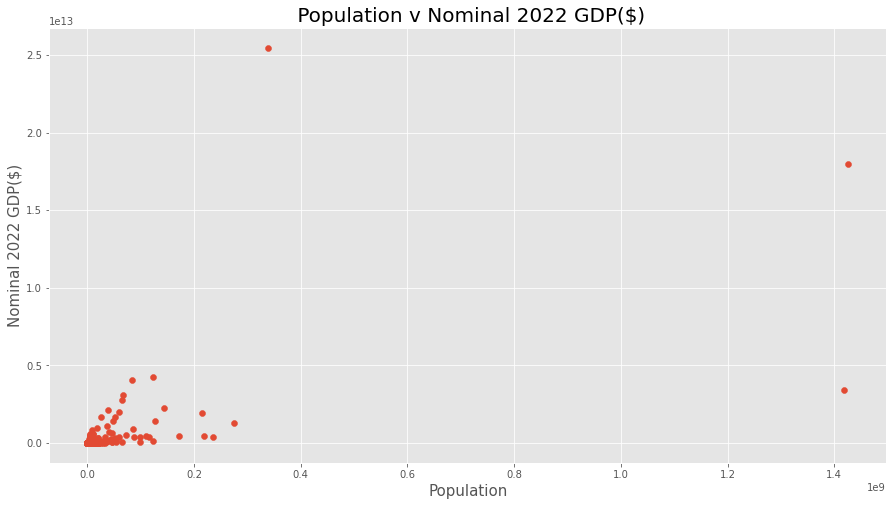

In [15]:
plt.figure(figsize = (15,8))
plt.style.use('ggplot')
plt.scatter(y = WorldGDPRankings['Nominal 2022 GDP($)'], x = WorldGDPRankings['Population'],)
plt.title( ' Population v Nominal 2022 GDP($)', fontsize = 20)
plt.xlabel('Population' ,fontsize = 15)
plt.ylabel('Nominal 2022 GDP($)', fontsize = 15)


<AxesSubplot:title={'center':'Correlation matrix'}>

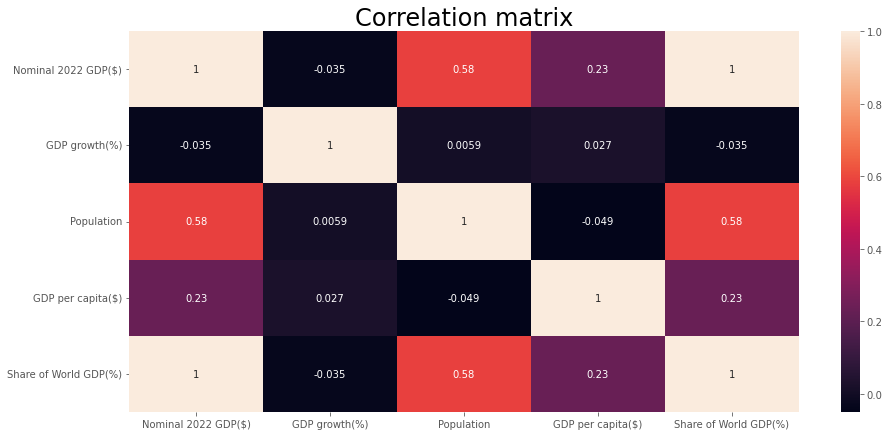

In [16]:
correlation_matrix = WorldGDPRankings.corr(method = 'pearson')
plt.figure(figsize = (15,7))
plt.title('Correlation matrix', fontsize = 24)
sns.heatmap(correlation_matrix, annot = True)

There is moderate positive linear correlation between population and Nominal GDP.

In [17]:
#Top 10 countries that have the highest GDP per Capita
top_10_richest = WorldGDPRankings.nlargest(10, 'GDP per capita($)')
top_10_richest[['Country','GDP per capita($)'] ]

,Country,GDP per capita($)
68,Luxembourg,127046
23,Norway,106594
25,Ireland,105362
19,Switzerland,92410
51,Qatar,88046
32,Singapore,78115
0,United States,75269
104,Iceland,74663
38,Denmark,67220
11,Australia,64003


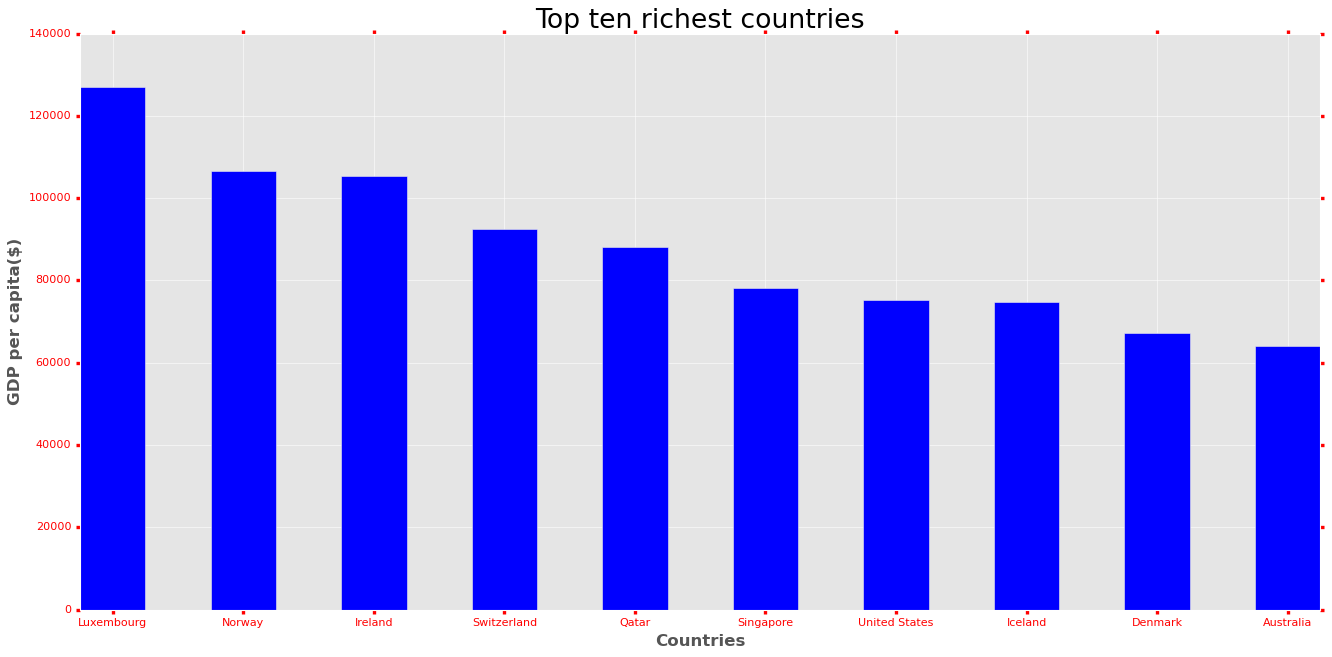

In [40]:
plt.figure(figsize = (20,9))
plt.style.use('ggplot')
plt.bar( top_10_richest['Country'],top_10_richest['GDP per capita($)'], width = 0.5 ,color = "blue")
plt.title('Top ten richest countries', fontsize = 24)
plt.ylabel('GDP per capita($)', fontsize  = 15, weight = 'bold')
plt.xlabel('Countries', fontsize = 15, weight = 'bold')
plt.tick_params(axis='x', colors='red',width=3)
plt.tick_params(axis='y', colors='red', width=3)

In [28]:
#top 5 contries that contribute the highest GDP share
top_5_GDP_Share = WorldGDPRankings.nlargest(5, 'Share of World GDP(%)')
top_5_GDP_Share[['Country','Share of World GDP(%)']]


,Country,Share of World GDP(%)
0,United States,25.32
1,China,17.86
2,Japan,4.21
3,Germany,4.05
4,India,3.37


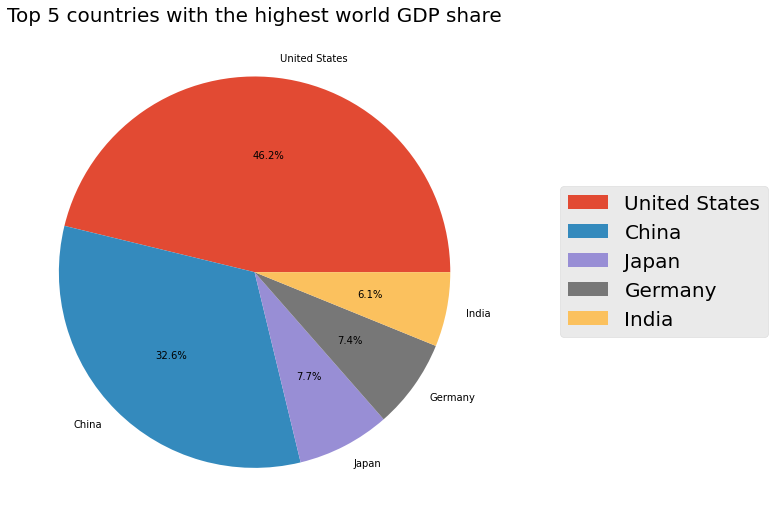

In [32]:
plt.figure(figsize = (15,9))
plt.pie(top_5_GDP_Share['Share of World GDP(%)'],labels = top_5_GDP_Share['Country'], autopct = "%1.1f%%")
plt.title('Top 5 countries with the highest world GDP share', fontsize = 20)
plt.figlegend(loc = 5, fontsize = 20)
plt.show()